In [2]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib


import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [3]:
name_molecule = 'CH4' #r'$H_{2}O$'

In [4]:
#### Load CRD results

In [6]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples', 
                           'lbl_H2012_{name_molecule}_cut25'\
                           .format(name_molecule=name_molecule),
                           'OUTPUT_RADSUM')

#pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_h2O_cut25/OUTPUT_RADSUM'

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True, 
                                                signed_fluxes=True)

print(pathout_crd)

/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2012_CH4_cut25/OUTPUT_RADSUM


In [7]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_{name_molecule}_cut10'\
                            .format(name_molecule=name_molecule),
                            'OUTPUT_RADSUM')

#pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
#                                                 cooling_rate=True, 
#                                                 signed_fluxes=True)

#print(pathout_crd1)

In [8]:
#### Load CLIRAD results

In [9]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_{name_molecule}_H2012'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.\
             OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad,
                                          cooling_rate=True, 
                                          signed_fluxes=True)

In [10]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_{name_molecule}'\
                                 .format(name_molecule=name_molecule),
                                 'OUTPUT_CLIRAD.dat')

#pnl_clirad_96 = cliradwrangle.\
#                OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96, 
#                                             cooling_rate=True,
#                                             signed_fluxes=True)

In [11]:
#### Load LBLRTM results

In [12]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls70pro_{name_molecule}'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_RADSUM')

pnl_lblrtm = aerutils.\
             OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                          signed_fluxes=True, 
                                          cooling_rate=True)

In [13]:
#### Load RRTMG results

In [14]:
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/LW/examples',
                             'mls70_{name_molecule}'\
                             .format(name_molecule=name_molecule),
                             'OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle.\
            OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg,
                                       signed_fluxes=True,
                                       cooling_rate = True)

# Whole spectral range

CRD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -418.881844   0.000000 -418.881844      0.000000
30   299.800000 -419.958384   0.507388 -419.450996     -0.025114
0   1013.000000 -423.662018   6.513381 -417.148637      0.089557

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -418.668138   0.000000 -418.668138      0.000000
30   299.8000 -419.771543   0.511088 -419.260455     -0.025865
0   1013.0000 -423.532488   6.425249 -417.107239      0.059300

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -418.1726     0.0000 -418.1726       0.00000
30   299.70000 -419.4765     0.5822 -418.8943      -0.03294
0   1013.00000 -423.5988     7.0786 -416.5202       0.09819

CLIRAD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -419.061038   0.000010 -419.061028     -0.000749
30   299.800000 -420.204498   0.491126 -419.713372     -0.023031
0   1013.000000 -423.78618

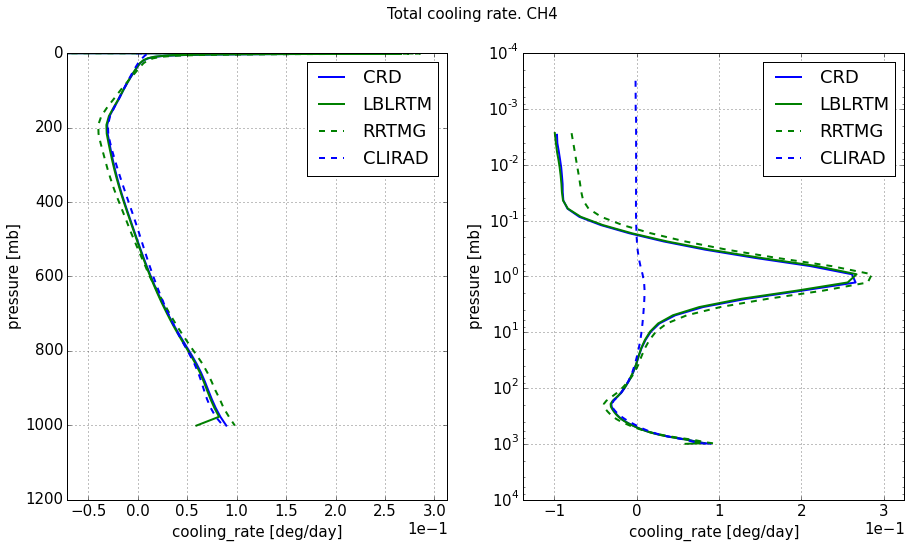

In [16]:
scripts_intermodel.lw_results_all_wavenumbers(
    infos_wavenumber=[('CRD', 'b', '-', pnl_crd),
                      ('LBLRTM', 'g', '-', pnl_lblrtm),
                      ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband=[('CLIRAD', 'b', '--', pnl_clirad)],
    name_molecule=name_molecule)

In [17]:
html_download = ('<a href="./longwave_mls_{name_molecule}_total.xlsx"'
                 'download>longwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW. Spectral band 1. 10.0 ~ 350.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -54.5825          0  -54.5825            -0
30   299.70000 -54.5825          0  -54.5825            -0
0   1013.00000 -54.5825          0  -54.5825            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -54.573765   0.000000 -54.573765  0.000000e+00
30   299.800000 -54.573774   0.000020 -54.573754  4.717334e-07
0   1013.000000 -54.573788   0.000174 -54.573613  2.692103e-06

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -54.662462   0.000000 -54.662462  0.000000e+00
30   299.8000 -54.662473   0.000024 -54.662450  5.581264e-07
0   1013.0000 -54.581667   0.000236 -54.581432  2.869351e-02

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.008735   0.000000 -0.008735 -0.000000e+00
30 -0.100000 -0.00

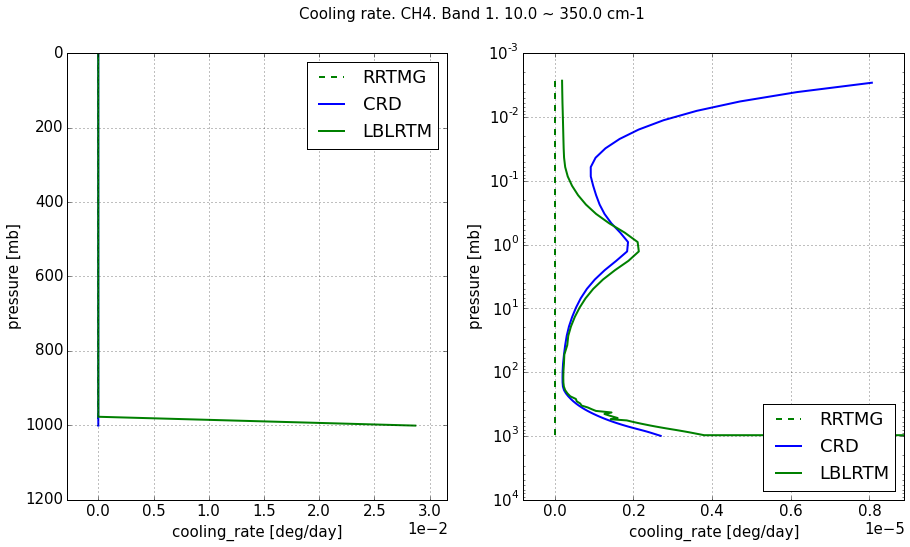


------------------------------------------------------------------------

RRTMG-LW. Spectral band 2. 350.0 ~ 500.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -60.9174          0  -60.9174            -0
30   299.70000 -60.9174          0  -60.9174            -0
0   1013.00000 -60.9174          0  -60.9174            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -60.916637  0.000000e+00 -60.916637  0.000000e+00
30   299.800000 -60.916638  3.421137e-07 -60.916637  1.696265e-09
0   1013.000000 -60.916638  2.425932e-06 -60.916635  4.322052e-08

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -60.928908  0.000000e+00 -60.928908  0.000000e+00
30   299.8000 -60.928908  8.221575e-08 -60.928908  1.292503e-09
0   1013.0000 -60.917465  2.148092e-06 -60.917463  4.062504e-03

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003 -0.000763  0.000

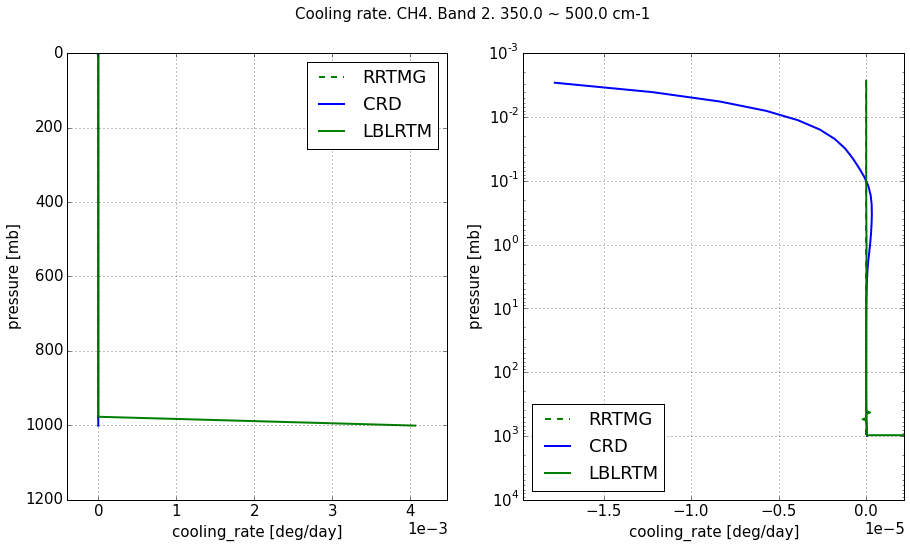


------------------------------------------------------------------------

RRTMG-LW. Spectral band 3. 500.0 ~ 630.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -58.6466          0  -58.6466            -0
30   299.70000 -58.6466          0  -58.6466            -0
0   1013.00000 -58.6466          0  -58.6466            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -58.652387  0.000000e+00 -58.652387  0.000000e+00
30   299.800000 -58.652387  2.208558e-07 -58.652386 -5.902157e-11
0   1013.000000 -58.652387  5.490994e-07 -58.652386  5.489802e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -58.636652  0.000000e+00 -58.636652  0.000000e+00
30   299.8000 -58.636652  3.345566e-09 -58.636652  7.292534e-12
0   1013.0000 -58.646623  2.273903e-07 -58.646623 -3.538996e-03

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.005787  0.000

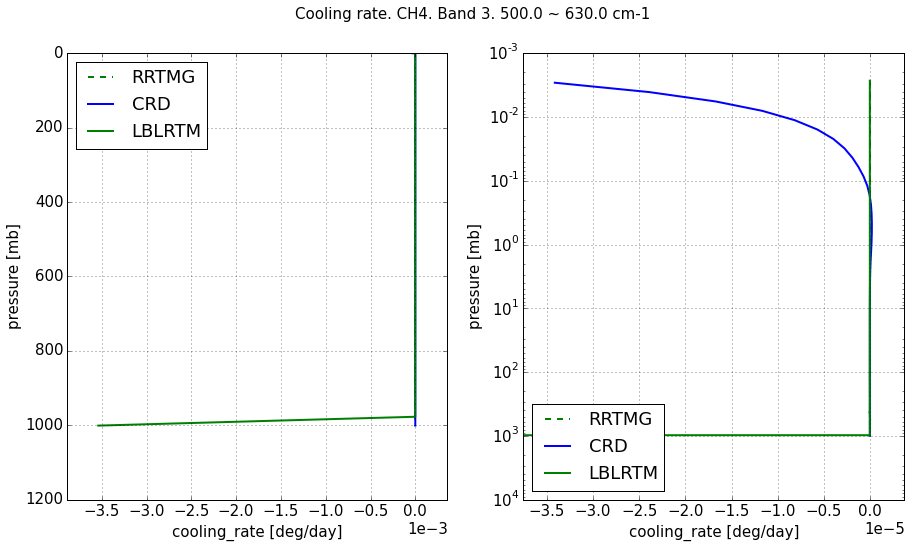


------------------------------------------------------------------------

RRTMG-LW. Spectral band 4. 630.0 ~ 700.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -30.8956     0.0000  -30.8956            -0
30   299.70000 -30.8956     0.0000  -30.8956            -0
0   1013.00000 -30.8956     0.0001  -30.8955            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.901144  0.000000e+00 -30.901144  0.000000e+00
30   299.800000 -30.901144  1.042659e-07 -30.901144 -2.544862e-10
0   1013.000000 -30.901144  2.621062e-07 -30.901144  2.635774e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -30.884518  0.000000e+00 -30.884518  0.000000e+00
30   299.8000 -30.884518  9.628351e-12 -30.884518 -1.041951e-13
0   1013.0000 -30.895458  1.832251e-09 -30.895457 -3.883145e-03

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.005544  0.000

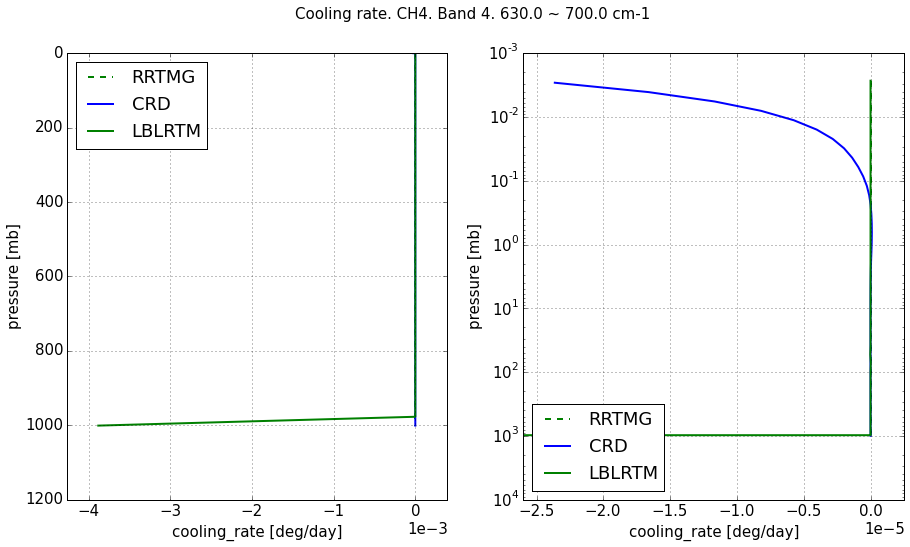


------------------------------------------------------------------------

RRTMG-LW. Spectral band 5. 700.0 ~ 820.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -48.8871          0  -48.8871            -0
30   299.70000 -48.8871          0  -48.8871            -0
0   1013.00000 -48.8871          0  -48.8871            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -48.899846  0.000000e+00 -48.899846  0.000000e+00
30   299.800000 -48.899846  1.516565e-07 -48.899845 -7.917343e-10
0   1013.000000 -48.899846  8.183804e-07 -48.899845  1.738784e-08

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -48.866333          0 -48.866333      0.000000
30   299.8000 -48.866333          0 -48.866333      0.000000
0   1013.0000 -48.886744          0 -48.886744     -0.007245

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.012746  0.000000e+00  0.0

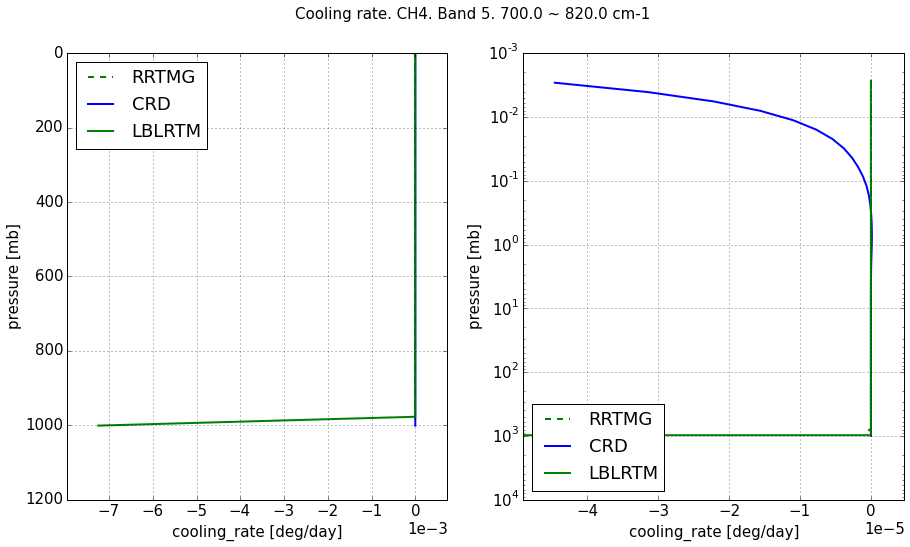


------------------------------------------------------------------------

RRTMG-LW. Spectral band 6. 820.0 ~ 980.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -53.9607          0  -53.9607            -0
30   299.70000 -53.9607          0  -53.9607            -0
0   1013.00000 -53.9607          0  -53.9607            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -53.981632  0.000000e+00 -53.981632  0.000000e+00
30   299.800000 -53.981633  2.386635e-07 -53.981632 -6.998520e-09
0   1013.000000 -53.981634  4.760983e-06 -53.981629  1.146395e-07

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -53.937441  0.000000e+00 -53.937441  0.000000e+00
30   299.8000 -53.937441  8.378268e-08 -53.937441 -5.045706e-09
0   1013.0000 -53.960338  3.400774e-06 -53.960334 -8.126728e-03

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.020932  0.000

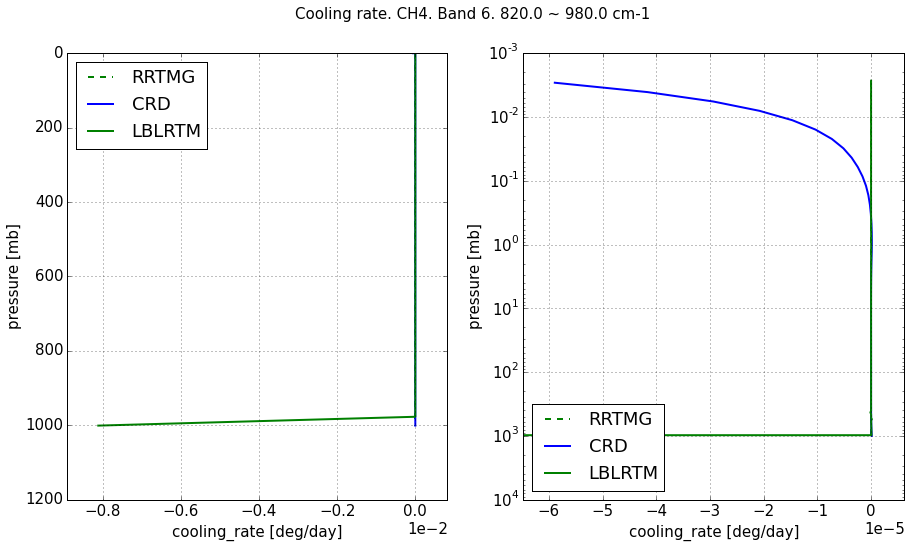


------------------------------------------------------------------------

RRTMG-LW. Spectral band 7. 980.0 ~ 1080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.6400     0.0000    -26.64            -0
30   299.70000 -26.6400     0.0000    -26.64            -0
0   1013.00000 -26.6401     0.0001    -26.64            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -26.653704   0.000000 -26.653704      0.000000
30   299.800000 -26.653836   0.000035 -26.653802     -0.000002
0   1013.000000 -26.654056   0.000622 -26.653434      0.000012

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -26.628845   0.000000 -26.628845      0.000000
30   299.8000 -26.628966   0.000032 -26.628934     -0.000002
0   1013.0000 -26.640246   0.000568 -26.639677     -0.003921

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.013704   0.000000  0.013704     -0.0000

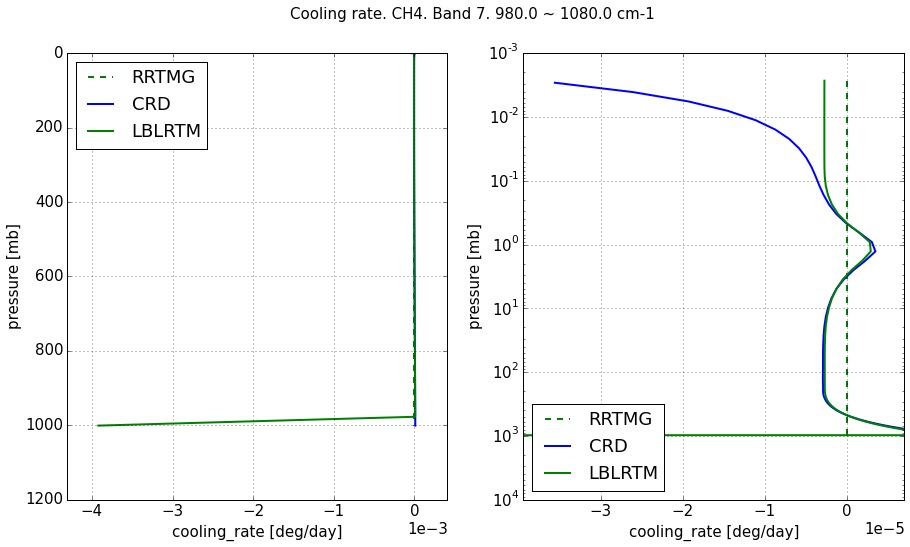


------------------------------------------------------------------------

RRTMG-LW. Spectral band 8. 1080.0 ~ 1180.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -21.5225          0  -21.5225            -0
30   299.70000 -21.5225          0  -21.5225            -0
0   1013.00000 -21.5225          0  -21.5225            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.519523   0.000000 -21.519523      0.000000
30   299.800000 -21.526161   0.001479 -21.524681     -0.000128
0   1013.000000 -21.535940   0.024658 -21.511282      0.000480

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -21.498618   0.000000 -21.498618      0.000000
30   299.8000 -21.504896   0.001383 -21.503513     -0.000121
0   1013.0000 -21.522739   0.023290 -21.499449     -0.002608

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.002977   0.000000 -0.002977     -0.000

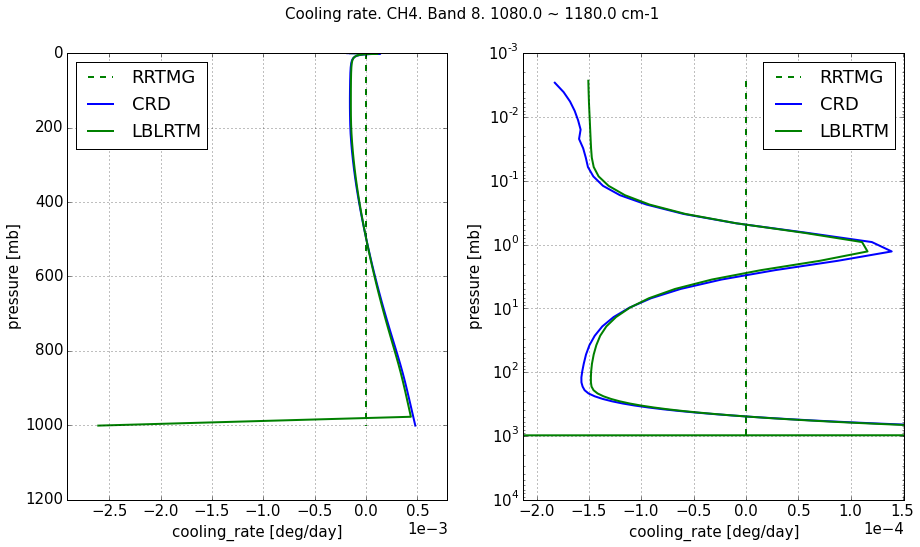


------------------------------------------------------------------------

RRTMG-LW. Spectral band 9. 1180.0 ~ 1390.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.1176     0.0000  -26.1176      -0.00000
30   299.70000 -27.3666     0.5800  -26.7866      -0.03067
0   1013.00000 -31.2994     6.8839  -24.4155       0.09338

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -26.738327   0.000000 -26.738327      0.000000
30   299.800000 -27.740558   0.497315 -27.243243     -0.023278
0   1013.000000 -31.323236   6.309822 -25.013414      0.085561

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -26.695002   0.000000 -26.695002      0.000000
30   299.8000 -27.724527   0.501367 -27.223161     -0.024061
0   1013.0000 -31.299603   6.229908 -25.069695      0.080114

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.620727   0.000000  0.620727     -0.000

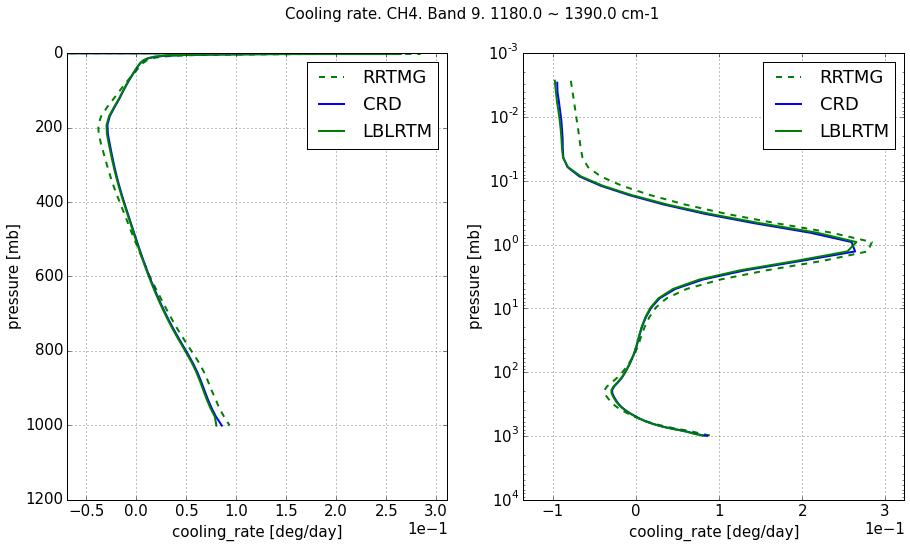


------------------------------------------------------------------------

RRTMG-LW. Spectral band 10. 1390.0 ~ 1480.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -8.8986          0   -8.8986            -0
30   299.70000  -8.8986          0   -8.8986            -0
0   1013.00000  -8.8986          0   -8.8986            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -8.827576   0.000000 -8.827576      0.000000
30   299.800000 -8.857559   0.004557 -8.853002     -0.000729
0   1013.000000 -8.906562   0.091008 -8.815554      0.001773

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -8.817397   0.000000 -8.817397      0.000000
30   299.8000 -8.847332   0.004417 -8.842915     -0.000719
0   1013.0000 -8.898490   0.087874 -8.810616      0.000374

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.071024   0.000000 -0.071024     -0.000000
30 -0.10000

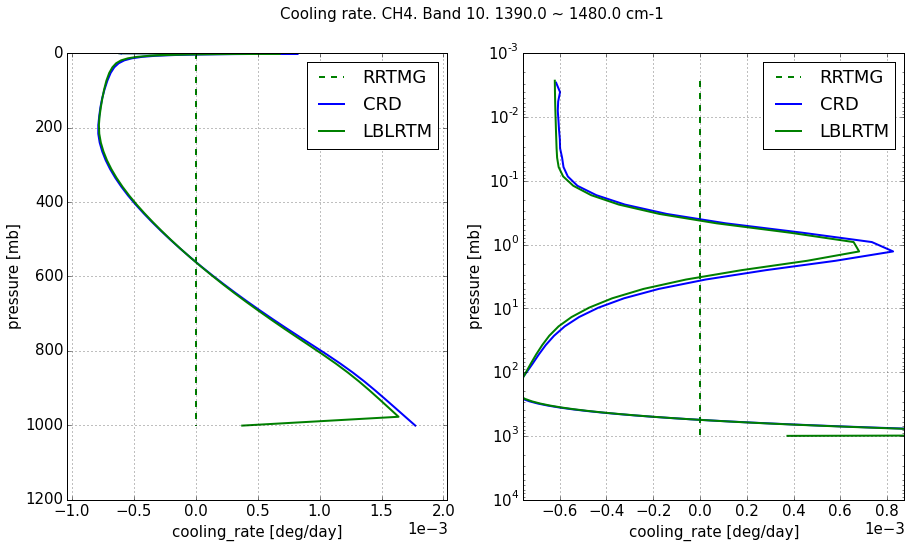


------------------------------------------------------------------------

RRTMG-LW. Spectral band 11. 1480.0 ~ 1800.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -17.8828          0  -17.8828            -0
30   299.70000 -17.8828          0  -17.8828            -0
0   1013.00000 -17.8828          0  -17.8828            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -17.828073   0.000000 -17.828073      0.000000
30   299.800000 -17.858905   0.003746 -17.855160     -0.000746
0   1013.000000 -17.902258   0.069742 -17.832516      0.001331

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -17.801381   0.000000 -17.801381      0.000000
30   299.8000 -17.832232   0.003642 -17.828591     -0.000736
0   1013.0000 -17.882889   0.066888 -17.816000     -0.001882

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.054727   0.000000 -0.054727     -0.00

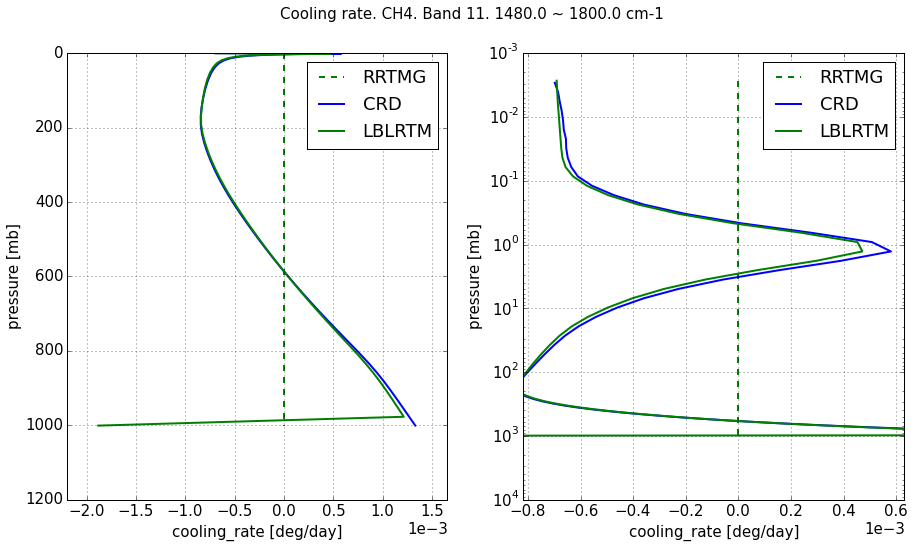


------------------------------------------------------------------------

RRTMG-LW. Spectral band 12. 1800.0 ~ 2080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -5.9578          0   -5.9578            -0
30   299.70000  -5.9578          0   -5.9578            -0
0   1013.00000  -5.9578          0   -5.9578            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -5.965830   0.000000 -5.965830      0.000000
30   299.800000 -5.965859   0.000003 -5.965856     -0.000001
0   1013.000000 -5.965987   0.000242 -5.965745      0.000007

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -5.895341   0.000000 -5.895341      0.000000
30   299.8000 -5.895368   0.000003 -5.895365     -0.000001
0   1013.0000 -5.957771   0.000233 -5.957538     -0.022100

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.008030   0.000000  0.008030     -0.000000
30 -0.10000

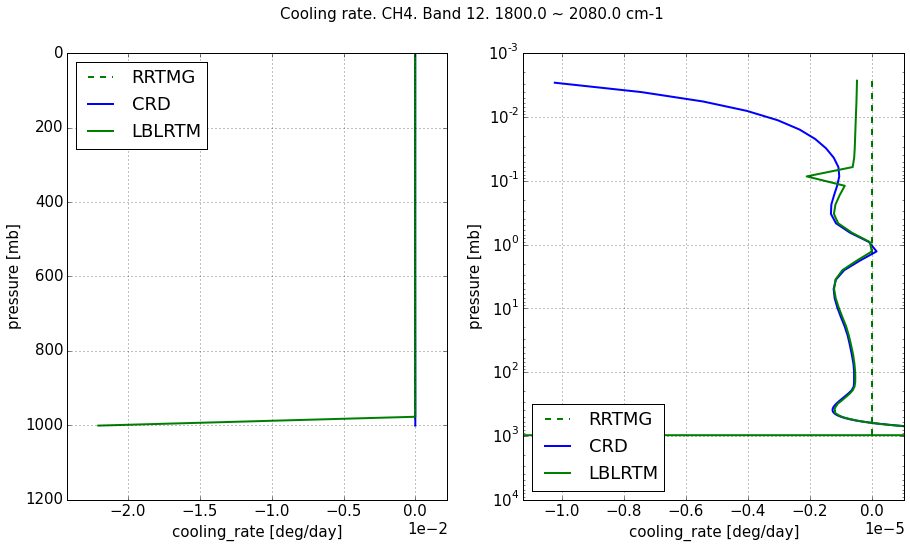


------------------------------------------------------------------------

RRTMG-LW. Spectral band 13. 2080.0 ~ 2250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242   -1.639          0    -1.639            -0
30   299.70000   -1.639          0    -1.639            -0
0   1013.00000   -1.639          0    -1.639            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -1.641498   0.000000 -1.641498      0.000000
30   299.800000 -1.641569   0.000003 -1.641566     -0.000002
0   1013.000000 -1.641655   0.000091 -1.641564      0.000002

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.637860   0.000000 -1.637860      0.000000
30   299.8000 -1.637927   0.000003 -1.637924     -0.000002
0   1013.0000 -1.639014   0.000086 -1.638929     -0.000355

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.002498   0.000000  0.002498     -0.000000
30 -0.10000

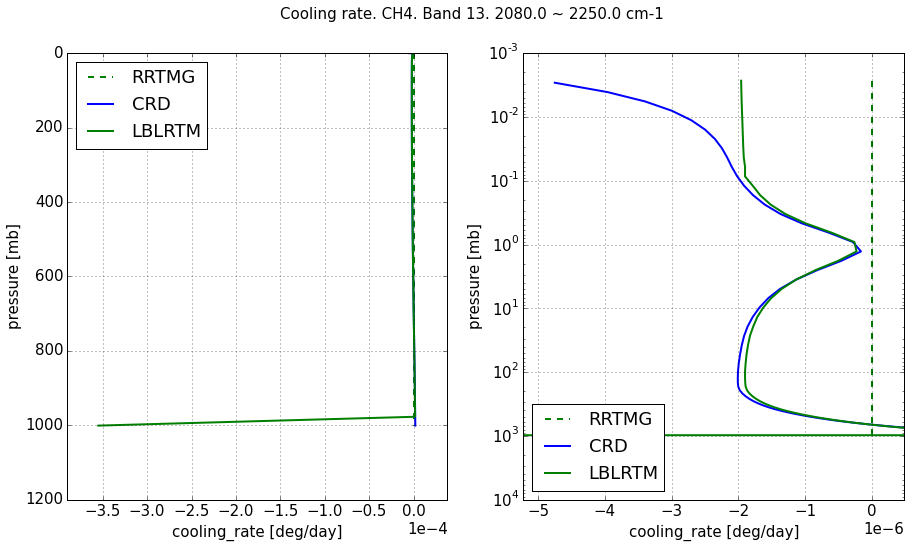


------------------------------------------------------------------------

RRTMG-LW. Spectral band 14. 2250.0 ~ 2380.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.7315          0   -0.7315            -0
30   299.70000  -0.7315          0   -0.7315            -0
0   1013.00000  -0.7316          0   -0.7316            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.732676   0.000000 -0.732676      0.000000
30   299.800000 -0.732733   0.000002 -0.732731     -0.000002
0   1013.000000 -0.732844   0.000128 -0.732715      0.000003

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.730930   0.000000 -0.730930      0.000000
30   299.8000 -0.730984   0.000002 -0.730982     -0.000002
0   1013.0000 -0.731556   0.000121 -0.731435     -0.000163

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.001176   0.000000  0.001176     -0.000000
30 -0.10000

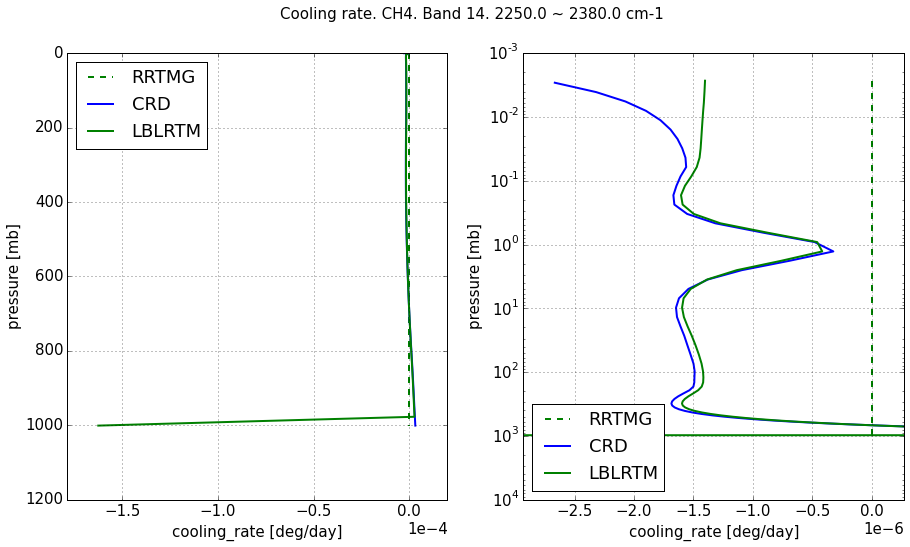


------------------------------------------------------------------------

RRTMG-LW. Spectral band 15. 2380.0 ~ 2600.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.5485     0.0000   -0.5485      -0.00000
30   299.70000  -0.5700     0.0007   -0.5693      -0.00110
0   1013.00000  -0.6658     0.1148   -0.5510       0.00315

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.663992   0.000000 -0.663992      0.000000
30   299.800000 -0.665211   0.000036 -0.665175     -0.000035
0   1013.000000 -0.667119   0.001787 -0.665332      0.000043

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.662364   0.000000 -0.662364      0.000000
30   299.8000 -0.663571   0.000034 -0.663537     -0.000034
0   1013.0000 -0.665840   0.001709 -0.664130     -0.000112

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.115492   0.000000  0.115492     -0.000000
30 -0.10000

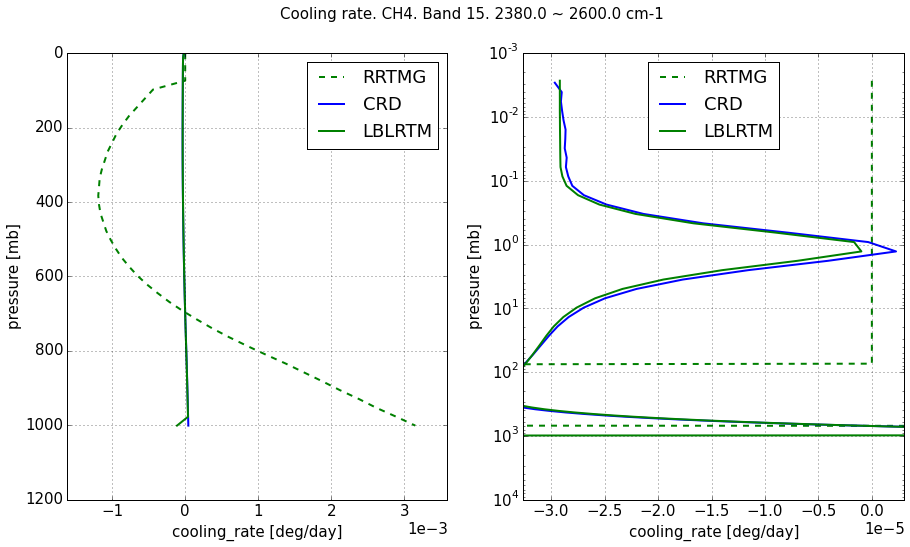


------------------------------------------------------------------------

RRTMG-LW. Spectral band 16. 2600.0 ~ 3250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.3444     0.0000   -0.3444      -0.00000
30   299.70000  -0.3778     0.0015   -0.3763      -0.00117
0   1013.00000  -0.4713     0.0797   -0.3916       0.00166

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.382739   0.000000 -0.382739      0.000000
30   299.800000 -0.388078   0.000191 -0.387887     -0.000191
0   1013.000000 -0.404431   0.015098 -0.389333      0.000342

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.381411   0.000000 -0.381411      0.000000
30   299.8000 -0.386738   0.000182 -0.386555     -0.000188
0   1013.0000 -0.403547   0.014330 -0.389217     -0.000071

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.038339   0.000000  0.038339     -0.000000
30 -0.10000

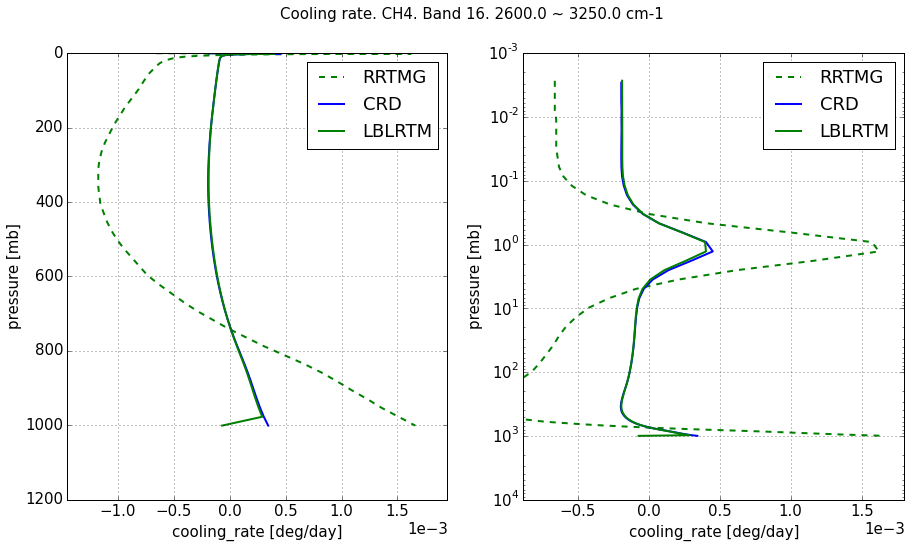


------------------------------------------------------------------------



In [18]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd), 
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [19]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and cooling rates in CLIRAD spectral bands


CLIRAD-LW Spectral band 1. 0 ~ 340 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -51.09212   0.000003 -51.092117 -5.771265e-07
30   299.800000 -51.09212   0.000003 -51.092117  2.273129e-09
0   1013.000000 -51.09213   0.000005 -51.092125  4.439772e-09

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -51.093017   0.000000 -51.093017  0.000000e+00
30   299.800000 -51.093026   0.000020 -51.093006  4.716381e-07
0   1013.000000 -51.093040   0.000174 -51.092866  2.690710e-06

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -51.180237   0.000000 -51.180237  0.000000e+00
30   299.8000 -51.180249   0.000024 -51.180225  5.577679e-07
0   1013.0000 -51.100657   0.000235 -51.100422  2.826266e-02

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.000897   0.000003  0.000900 -5.771265e-07
30      

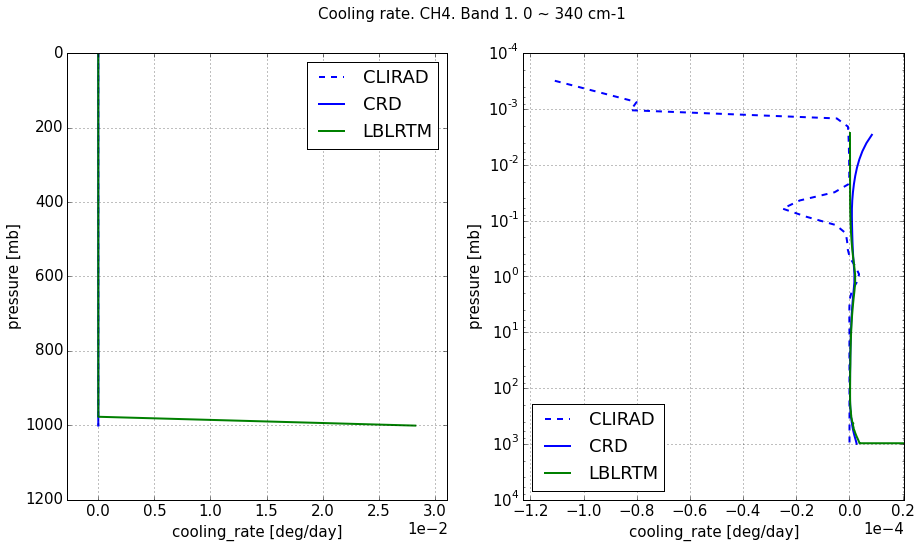


------------------------------------------------------------------------

CLIRAD-LW Spectral band 2. 340 ~ 540 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -82.31579   0.000003 -82.315787 -1.784270e-06
30   299.800000 -82.31579   0.000005 -82.315785  3.727262e-09
0   1013.000000 -82.31579   0.000008 -82.315782  1.023691e-08

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -82.315834  0.000000e+00 -82.315834  0.000000e+00
30   299.800000 -82.315834  4.316282e-07 -82.315834  1.835111e-09
0   1013.000000 -82.315835  2.703152e-06 -82.315832  4.677852e-08

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -82.326887  0.000000e+00 -82.326887  0.000000e+00
30   299.8000 -82.326887  1.040295e-07 -82.326887  1.659912e-09
0   1013.0000 -82.315849  2.816191e-06 -82.315846  3.918601e-03

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.000044

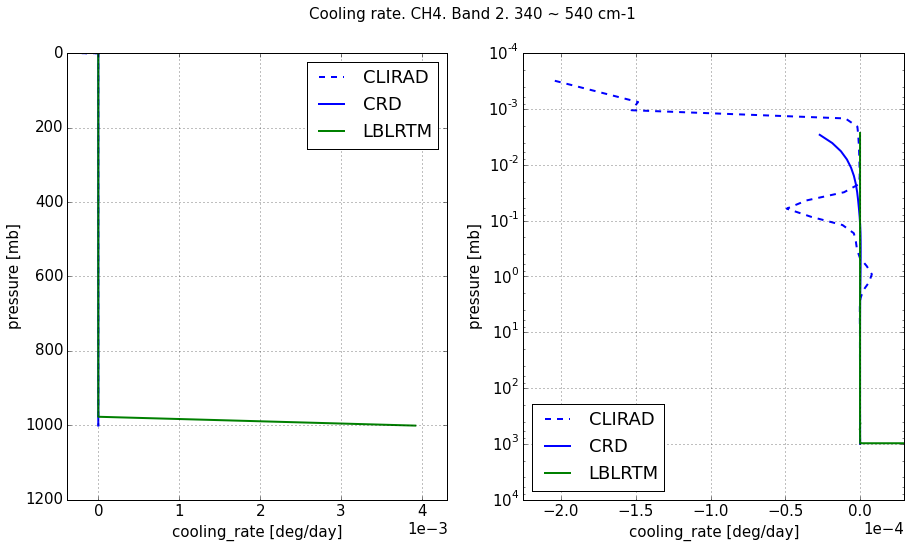


------------------------------------------------------------------------

CLIRAD-LW Spectral band 3. 540 ~ 800 cm-1

CLIRAD
       pressure  flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -112.816   0.000003 -112.815997 -3.838177e-06
30   299.800000 -112.816   0.000005 -112.815995  3.702570e-09
0   1013.000000 -112.816   0.000011 -112.815989  1.932914e-08

CRD
       pressure     flux_up     flux_down    net_flux  cooling_rate
70     0.002417 -112.837813  0.000000e+00 -112.837813  0.000000e+00
30   299.800000 -112.837813  3.828323e-07 -112.837813 -9.823108e-10
0   1013.000000 -112.837813  1.252645e-06 -112.837812  1.877839e-08

LBLRTM
     pressure     flux_up     flux_down    net_flux  cooling_rate
70     0.0024 -112.780408  0.000000e+00 -112.780408  0.000000e+00
30   299.8000 -112.780408  8.571816e-10 -112.780408 -1.577803e-12
0   1013.0000 -112.816764  8.076398e-08 -112.816764 -1.290397e-02

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70    

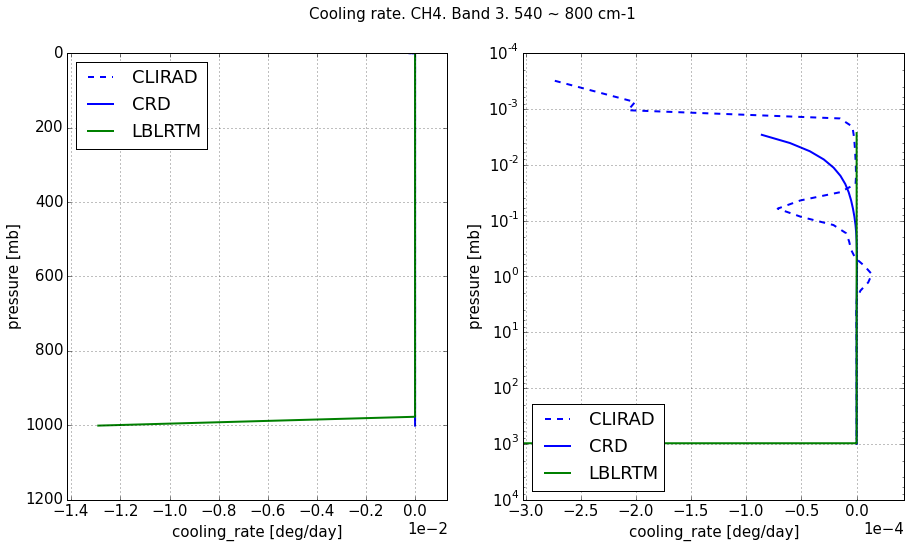


------------------------------------------------------------------------

CLIRAD-LW Spectral band 4. 800 ~ 980 cm-1

CLIRAD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -61.64931  6.214958e-10 -61.64931            -0
30   299.800000 -61.64931  6.214977e-10 -61.64931            -0
0   1013.000000 -61.64931  6.214976e-10 -61.64931            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -61.681241  0.000000e+00 -61.681241  0.000000e+00
30   299.800000 -61.681242  2.616638e-07 -61.681241 -7.164803e-09
0   1013.000000 -61.681243  4.948029e-06 -61.681238  1.192103e-07

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -61.631457  0.000000e+00 -61.631457  0.000000e+00
30   299.8000 -61.631458  8.378268e-08 -61.631457 -5.045706e-09
0   1013.0000 -61.657526  3.400774e-06 -61.657522 -9.252602e-03

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         

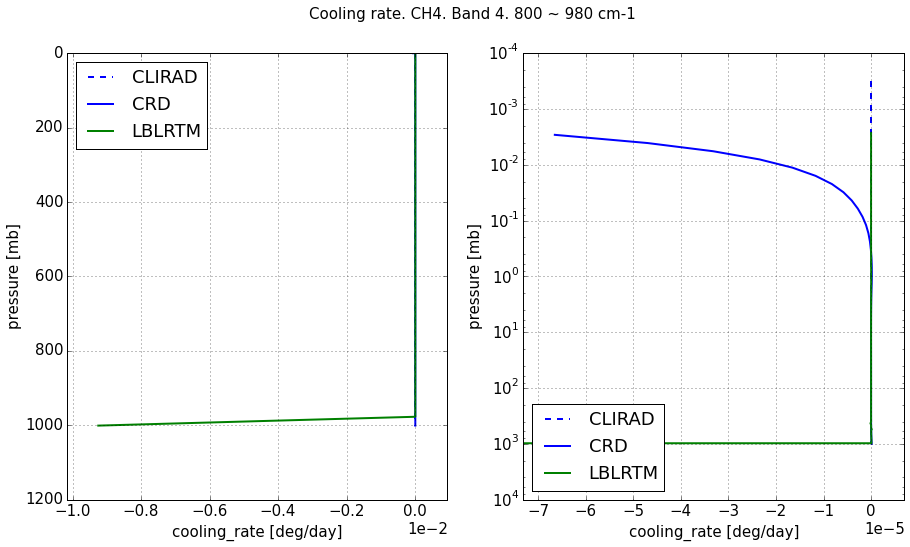


------------------------------------------------------------------------

CLIRAD-LW Spectral band 5. 980 ~ 1100 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -31.34389  4.351434e-07 -31.343890 -1.434995e-06
30   299.800000 -31.34389  9.052445e-07 -31.343889 -3.867155e-11
0   1013.000000 -31.34389  3.112896e-06 -31.343887  8.022594e-09

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -31.353362   0.000000 -31.353362      0.000000
30   299.800000 -31.353711   0.000088 -31.353623     -0.000006
0   1013.000000 -31.354231   0.001412 -31.352819      0.000027

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -31.323913   0.000000 -31.323913      0.000000
30   299.8000 -31.324237   0.000081 -31.324156     -0.000006
0   1013.0000 -31.337711   0.001297 -31.336414     -0.004588

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.009472  4.3514

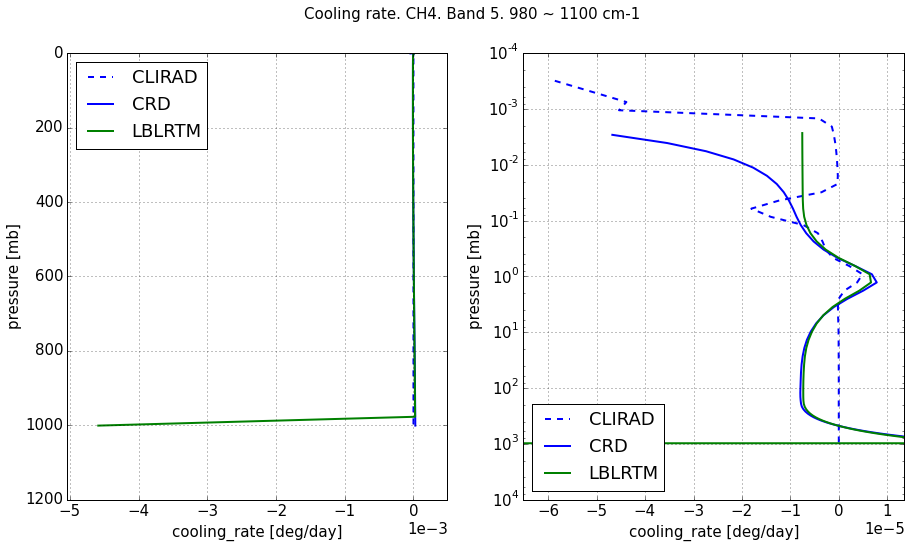


------------------------------------------------------------------------

CLIRAD-LW Spectral band 6. 1100 ~ 1215 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -23.18448  2.882652e-08 -23.184480     -0.000729
30   299.800000 -23.21590  7.103625e-03 -23.208796     -0.000639
0   1013.000000 -23.27341  1.544877e-01 -23.118922      0.003235

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -23.182421   0.000000 -23.182421      0.000000
30   299.800000 -23.209583   0.006494 -23.203089     -0.000625
0   1013.000000 -23.269652   0.149109 -23.120543      0.002996

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -23.160332   0.000000 -23.160332      0.000000
30   299.8000 -23.187223   0.006278 -23.180945     -0.000616
0   1013.0000 -23.254791   0.145243 -23.109548     -0.000330

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.002059  2.882

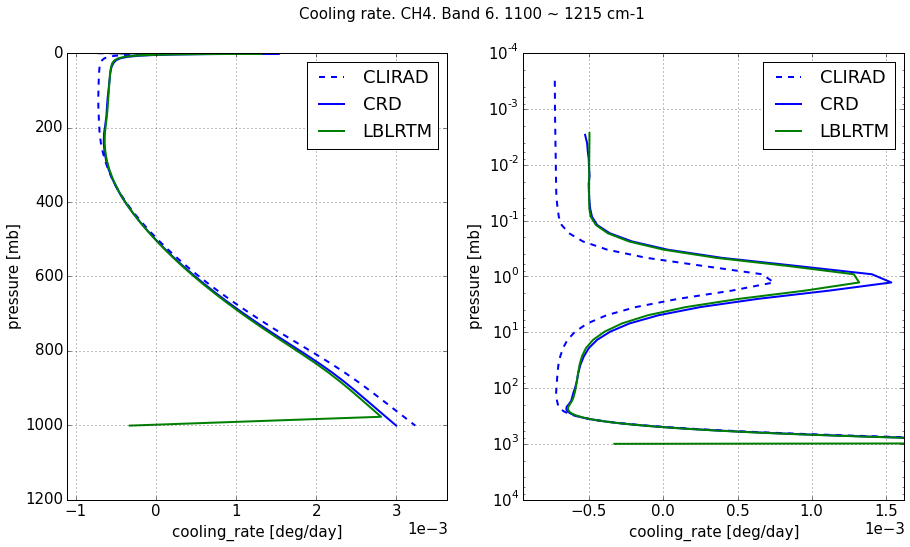


------------------------------------------------------------------------

CLIRAD-LW Spectral band 7. 1215 ~ 1380 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -19.10439  2.017223e-09 -19.104390     -0.000012
30   299.800000 -20.21643  4.840077e-01 -19.732422     -0.022392
0   1013.000000 -23.74060  6.274713e+00 -17.465887      0.083027

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -19.272386   0.000000 -19.272386      0.000000
30   299.800000 -20.245881   0.490673 -19.755208     -0.022554
0   1013.000000 -23.755165   6.135326 -17.619839      0.081990

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -19.233796   0.000000 -19.233796      0.000000
30   299.8000 -20.235008   0.494997 -19.740012     -0.023356
0   1013.0000 -23.736876   6.062321 -17.674556      0.077753

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.167996  2.017

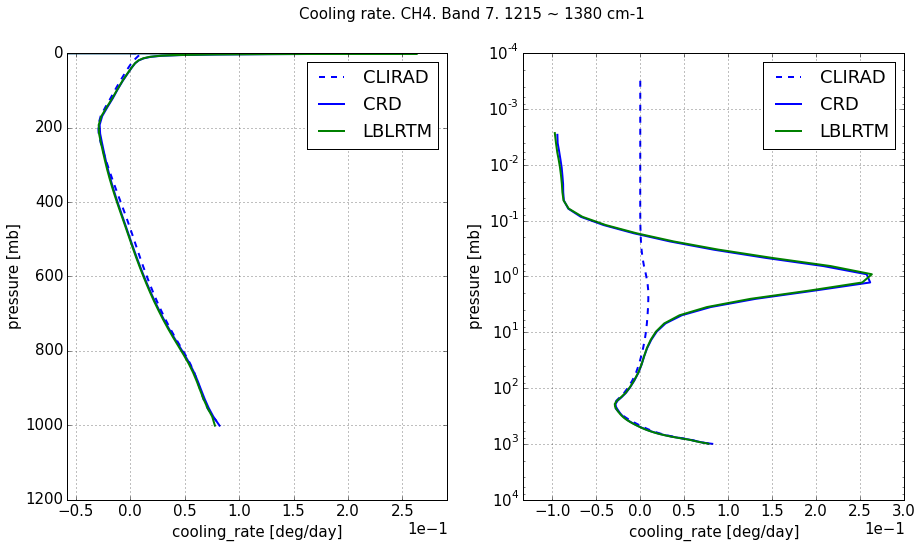


------------------------------------------------------------------------

CLIRAD-LW Spectral band 8. 1380 ~ 1900 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.88056  1.657780e-07 -30.880560 -1.230132e-06
30   299.800000 -30.88056  4.821160e-07 -30.880560 -1.326435e-09
0   1013.000000 -30.88056  3.055093e-06 -30.880557  1.175503e-08

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.545470   0.000000 -30.545470      0.000000
30   299.800000 -30.614308   0.009879 -30.604429     -0.001699
0   1013.000000 -30.729595   0.210245 -30.519350      0.004150

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.504437   0.000000 -30.504437      0.000000
30   299.8000 -30.572748   0.009488 -30.563260     -0.001662
0   1013.0000 -30.697533   0.199886 -30.497647     -0.001309

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.335090  1.657

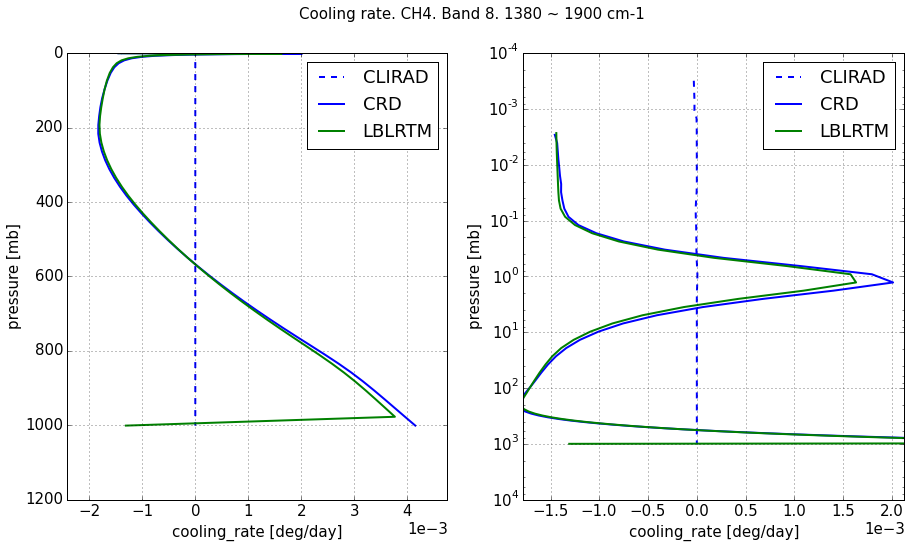


------------------------------------------------------------------------

CLIRAD-LW Spectral band 9. 1900 ~ 3000 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -6.674498          0 -6.674498            -0
30   299.800000 -6.674498          0 -6.674498            -0
0   1013.000000 -6.674498          0 -6.674498            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -6.600299   0.000000 -6.600299      0.000000
30   299.800000 -6.606985   0.000232 -6.606753     -0.000230
0   1013.000000 -6.625445   0.017107 -6.608338      0.000391

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -6.526670   0.000000 -6.526670      0.000000
30   299.8000 -6.533326   0.000221 -6.533105     -0.000226
0   1013.0000 -6.614782   0.016261 -6.598522     -0.022250

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.074199   0.000000 -0.074199     -0.000000
30    

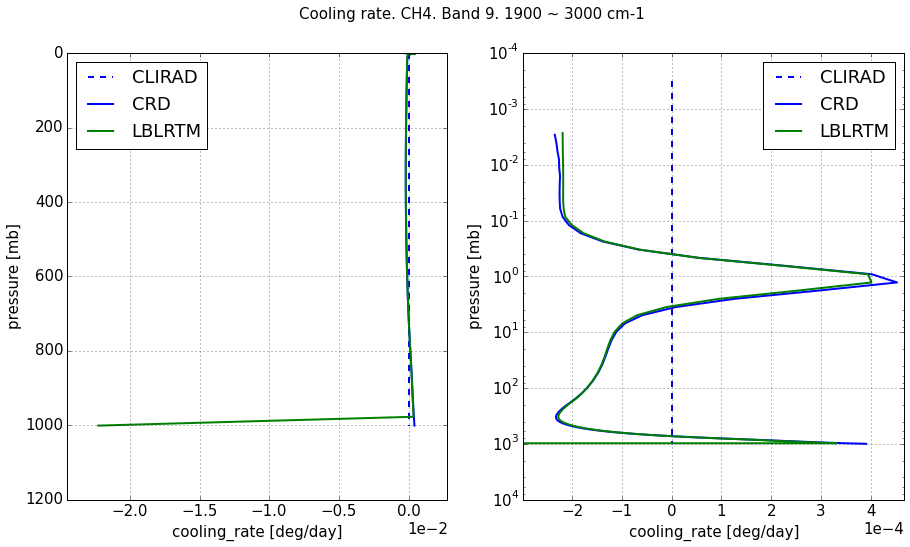


------------------------------------------------------------------------

CLIRAD-LW Spectral band 10. 540 ~ 620 cm-1

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -36.23542  0.000000e+00 -36.23542  0.000000e+00
30   299.800000 -36.23542  1.340608e-07 -36.23542 -7.792009e-11
0   1013.000000 -36.23542  3.210479e-07 -36.23542  2.972325e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -36.224617  0.000000e+00 -36.224617  0.000000e+00
30   299.8000 -36.224617  8.381952e-10 -36.224617 -1.390555e-12
0   1013.0000 -36.231410  7.745218e-08 -36.231410 -2.410886e-03

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  36.23542  0.000000e+

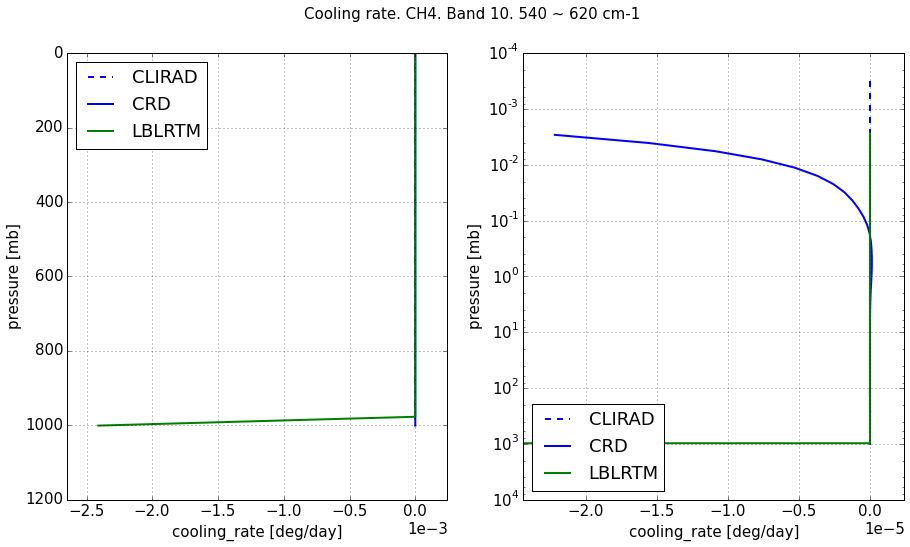


------------------------------------------------------------------------



In [20]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.lw_results_by_cliard_bands(
    infos_clirad=[('CLIRAD', 'b', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [21]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

In [22]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')